Bedankt https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html voor de code

## Load libraries

In [6]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras import layers, Dense, Input, InputLayer, Flatten
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

ModuleNotFoundError: No module named 'tensorflow'

## Load data

In [5]:
# load all images in a directory
from os import listdir
from matplotlib import image
# load all images in a directory
loaded_images = list()
for filename in listdir('images'):
	# load image
	img_data = image.imread('images/' + filename)

	# store loaded image
	loaded_images.append(img_data)
	print('> loaded %s %s' % (filename, img_data.shape))


> loaded roadmark_0001.jpg (600, 800, 3)
> loaded roadmark_0002.jpg (600, 800, 3)
> loaded roadmark_0003.jpg (600, 800, 3)
> loaded roadmark_0004.jpg (600, 800, 3)
> loaded roadmark_0005.jpg (600, 800, 3)
> loaded roadmark_0006.jpg (600, 800, 3)
> loaded roadmark_0007.jpg (600, 800, 3)
> loaded roadmark_0008.jpg (600, 800, 3)
> loaded roadmark_0009.jpg (600, 800, 3)
> loaded roadmark_0010.jpg (600, 800, 3)
> loaded roadmark_0011.jpg (600, 800, 3)
> loaded roadmark_0012.jpg (600, 800, 3)
> loaded roadmark_0013.jpg (600, 800, 3)
> loaded roadmark_0014.jpg (600, 800, 3)
> loaded roadmark_0015.jpg (600, 800, 3)
> loaded roadmark_0016.jpg (600, 800, 3)
> loaded roadmark_0017.jpg (600, 800, 3)
> loaded roadmark_0018.jpg (600, 800, 3)
> loaded roadmark_0019.jpg (600, 800, 3)
> loaded roadmark_0020.jpg (600, 800, 3)
> loaded roadmark_0021.jpg (600, 800, 3)
> loaded roadmark_0022.jpg (600, 800, 3)
> loaded roadmark_0023.jpg (600, 800, 3)
> loaded roadmark_0024.jpg (600, 800, 3)
> loaded roadmar

In [7]:
plt.figure(figsize=(20,20))
test_folder=r'Images'
for i in range(5):
    file = random.choice(os.listdir(img_folder))
    image_path= os.path.join(img_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

NameError: name 'random' is not defined

<Figure size 1440x1440 with 0 Axes>

In [10]:
def create_dataset(img_folder):

    img_data_array=[]
    class_name=[]

    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):

            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread(image_path, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name# extract the image array and class name

img_data, class_name = create_dataset(r'Images')



NotADirectoryError: [WinError 267] The directory name is invalid: 'Images\\roadmark_0001.jpg'

In [ ]:
digits = datasets.load_digits()
type(digits)

## Show data

In [16]:
digits['images']
type(digits)

sklearn.utils.Bunch

In [17]:
digits['target'][0]
type(digits)

sklearn.utils.Bunch

## Show sample images

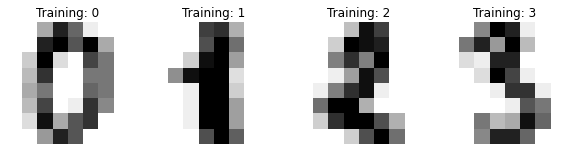

In [5]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

## Data manipulation

In [6]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [7]:
#check
print(digits['images'][0].shape)
print(data[0].shape)
print(data.shape)

(8, 8)
(64,)
(1797, 64)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

In [9]:
y_train[0]

0

## Train en evaluate model

In [10]:
clf = svm.SVC(gamma=0.001)

In [11]:
clf.fit(X_train, y_train)

SVC(gamma=0.001)

In [12]:
predicted = clf.predict(X_test)

In [13]:
accuracy_score(y_test, predicted)

0.9688542825361512

## Confusion matrix

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


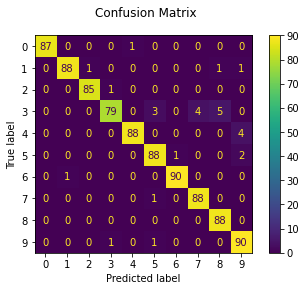

In [14]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()